# Zadanie III

### Instalacja bibliotek

In [ ]:
conda install pandas

In [ ]:
conda install seaborn

In [ ]:
conda install matplotlib

### Importowanie

In [2]:
import pandas as pd

In [3]:
import seaborn as sb

In [4]:
import matplotlib.pyplot as plt

### 1.

In [5]:
zad = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', \
                 names=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',\
               'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',\
              'Mitoses', 'Class:'])

In [6]:
zad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class:                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### 2.

In [7]:
del zad['Sample code number']

In [8]:
zad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class:                       699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### 3.

In [9]:
bare_nuclei_numeric = pd.to_numeric(zad['Bare Nuclei'], errors='coerce')

print(bare_nuclei_numeric.dtype)

float64


In [10]:
print(bare_nuclei_numeric[bare_nuclei_numeric.isna()])

23    NaN
40    NaN
139   NaN
145   NaN
158   NaN
164   NaN
235   NaN
249   NaN
275   NaN
292   NaN
294   NaN
297   NaN
315   NaN
321   NaN
411   NaN
617   NaN
Name: Bare Nuclei, dtype: float64


In [11]:
zad['Bare Nuclei'] = bare_nuclei_numeric

In [12]:
zad['Bare Nuclei'] = zad['Bare Nuclei'].fillna(bare_nuclei_numeric.mode())

In [13]:
zad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class:                       699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [14]:
print(bare_nuclei_numeric.mode())

0    1.0
dtype: float64


In [15]:
print(zad[bare_nuclei_numeric.isna()])

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
23                 8                        4                         5   
40                 6                        6                         6   
139                1                        1                         1   
145                1                        1                         3   
158                1                        1                         2   
164                5                        1                         1   
235                3                        1                         4   
249                3                        1                         1   
275                3                        1                         3   
292                8                        8                         8   
294                1                        1                         1   
297                5                        4                         3   
315                4     

### UWAGA !!! Z nieznanego powodu, wartości 'NaN' nie są zastępowane przez wartość modalną. Przy próbie zastąpienia przez wartość 'mean()' wszystko działa w porządku. Z tego powodu dane z wartością 'NaN' zostaną usunięte.

In [16]:
zad = zad.dropna()

In [17]:
zad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              683 non-null    int64  
 1   Uniformity of Cell Size      683 non-null    int64  
 2   Uniformity of Cell Shape     683 non-null    int64  
 3   Marginal Adhesion            683 non-null    int64  
 4   Single Epithelial Cell Size  683 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              683 non-null    int64  
 7   Normal Nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class:                       683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


In [18]:
zad.isna().values.any()

False

### 4.

In [19]:
zad.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


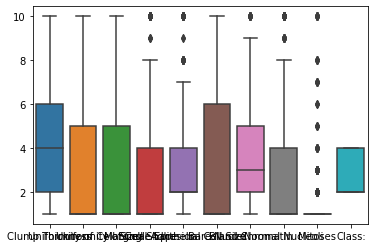

In [30]:
sb.boxplot(data=zad)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/s

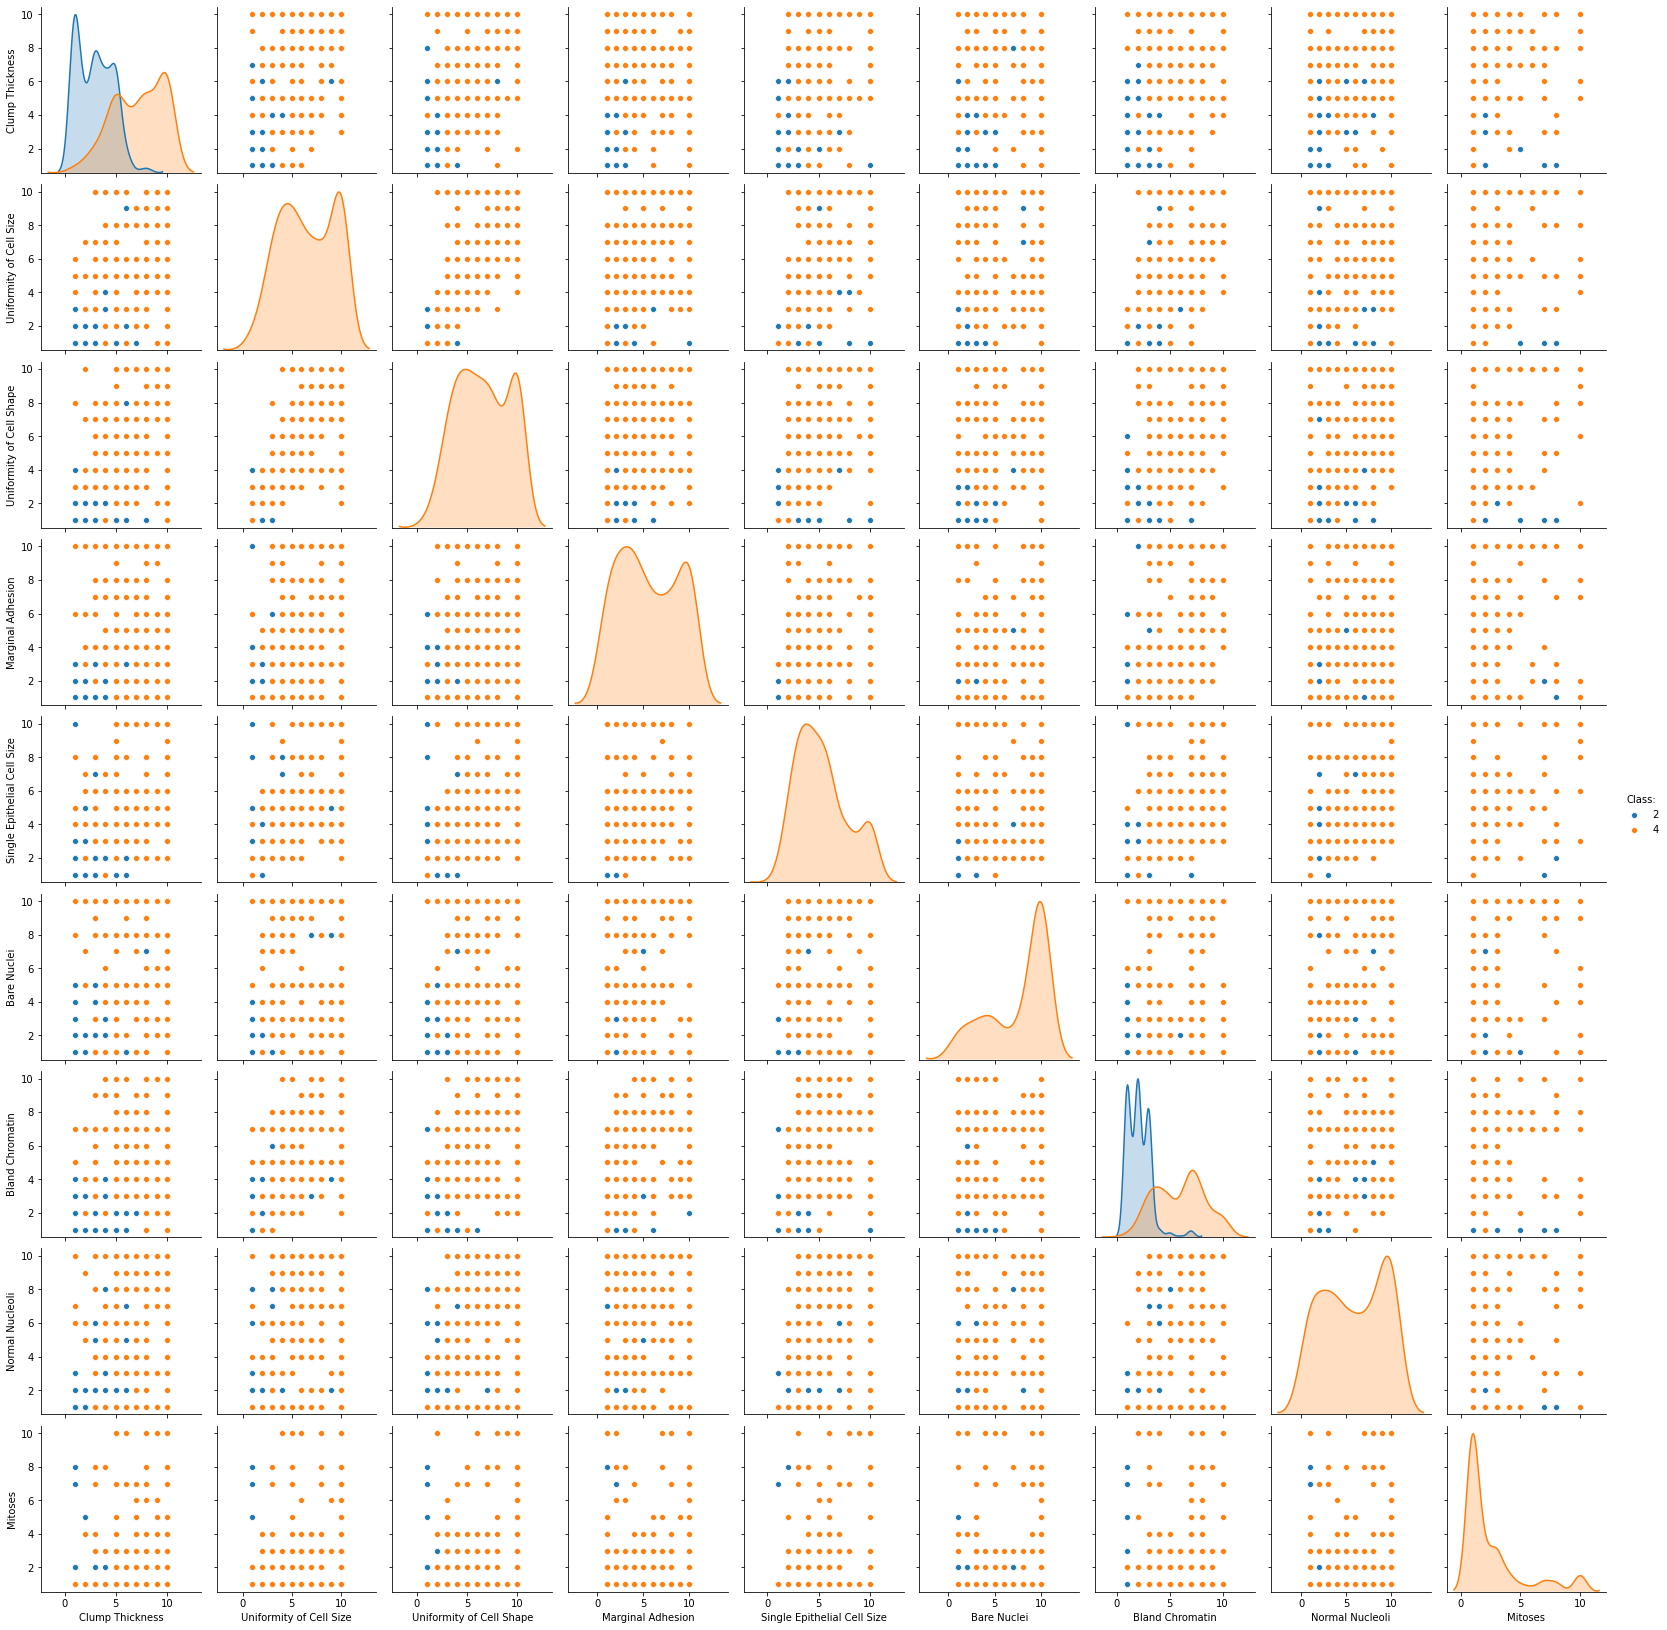

In [32]:
sb.pairplot(data=zad, hue="Class:")


### 5.

In [20]:
zad.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [27]:
zad.describe().loc['mean']['Mitoses']

1.603221083455344

In [42]:
for column in range(10):
    print(zad.columns[column])

Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei
Bland Chromatin
Normal Nucleoli
Mitoses
Class:


### Dane do usunięcia:

In [77]:
data_to_del = (zad[zad.columns[0]] < zad.describe().loc['mean'][zad.columns[0]] - (3 * zad.describe().loc['std'][zad.columns[0]])) | \
                      (zad[zad.columns[0]] > zad.describe().loc['mean'][zad.columns[0]] + (3 * zad.describe().loc['std'][zad.columns[0]]))
for column in range(1, 10):
    data_to_del += (zad[zad.columns[column]] < zad.describe().loc['mean'][zad.columns[column]] - (3 * zad.describe().loc['std'][zad.columns[column]])) | \
                      (zad[zad.columns[column]] > zad.describe().loc['mean'][zad.columns[column]] + (3 * zad.describe().loc['std'][zad.columns[column]]))
zad_to_del = zad.loc[data_to_del]
print(zad_to_del.count())

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


Clump Thickness                51
Uniformity of Cell Size        51
Uniformity of Cell Shape       51
Marginal Adhesion              51
Single Epithelial Cell Size    51
Bare Nuclei                    51
Bland Chromatin                51
Normal Nucleoli                51
Mitoses                        51
Class:                         51
dtype: int64


In [83]:
data_to_save = ~data_to_del
zad_new=zad.loc[data_to_save]
print(zad_new.sum())

Clump Thickness                632
Uniformity of Cell Size        632
Uniformity of Cell Shape       632
Marginal Adhesion              632
Single Epithelial Cell Size    632
Bare Nuclei                    632
Bland Chromatin                632
Normal Nucleoli                632
Mitoses                        632
Class:                         632
dtype: int64


Usunięto poprawną ilość danych

### 6.

In [104]:
zad_new_d = zad_new.duplicated(keep='first')

zad_new = zad_new.drop_duplicates()
print('Przypadki przed odrzuceniem: 632, po odrzuceniu: %d' % zad_new.shape[0])

Przypadki przed odrzuceniem: 632, po odrzuceniu: 399
